In [27]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import silhouette_score
from sklearn.metrics.cluster import pair_confusion_matrix
from sklearn.metrics import accuracy_score

from warnings import filterwarnings
filterwarnings('ignore')

random_state = 42

In [3]:
data = pd.read_csv('./seeds_dataset.txt', sep='\t', header=None)
data.head()

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [6]:
data.describe()

,0,1,2,3,4,5,6,7
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,1.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,0.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,0.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,1.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,2.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,2.000000


In [7]:
data[7] = data[7].astype(str)

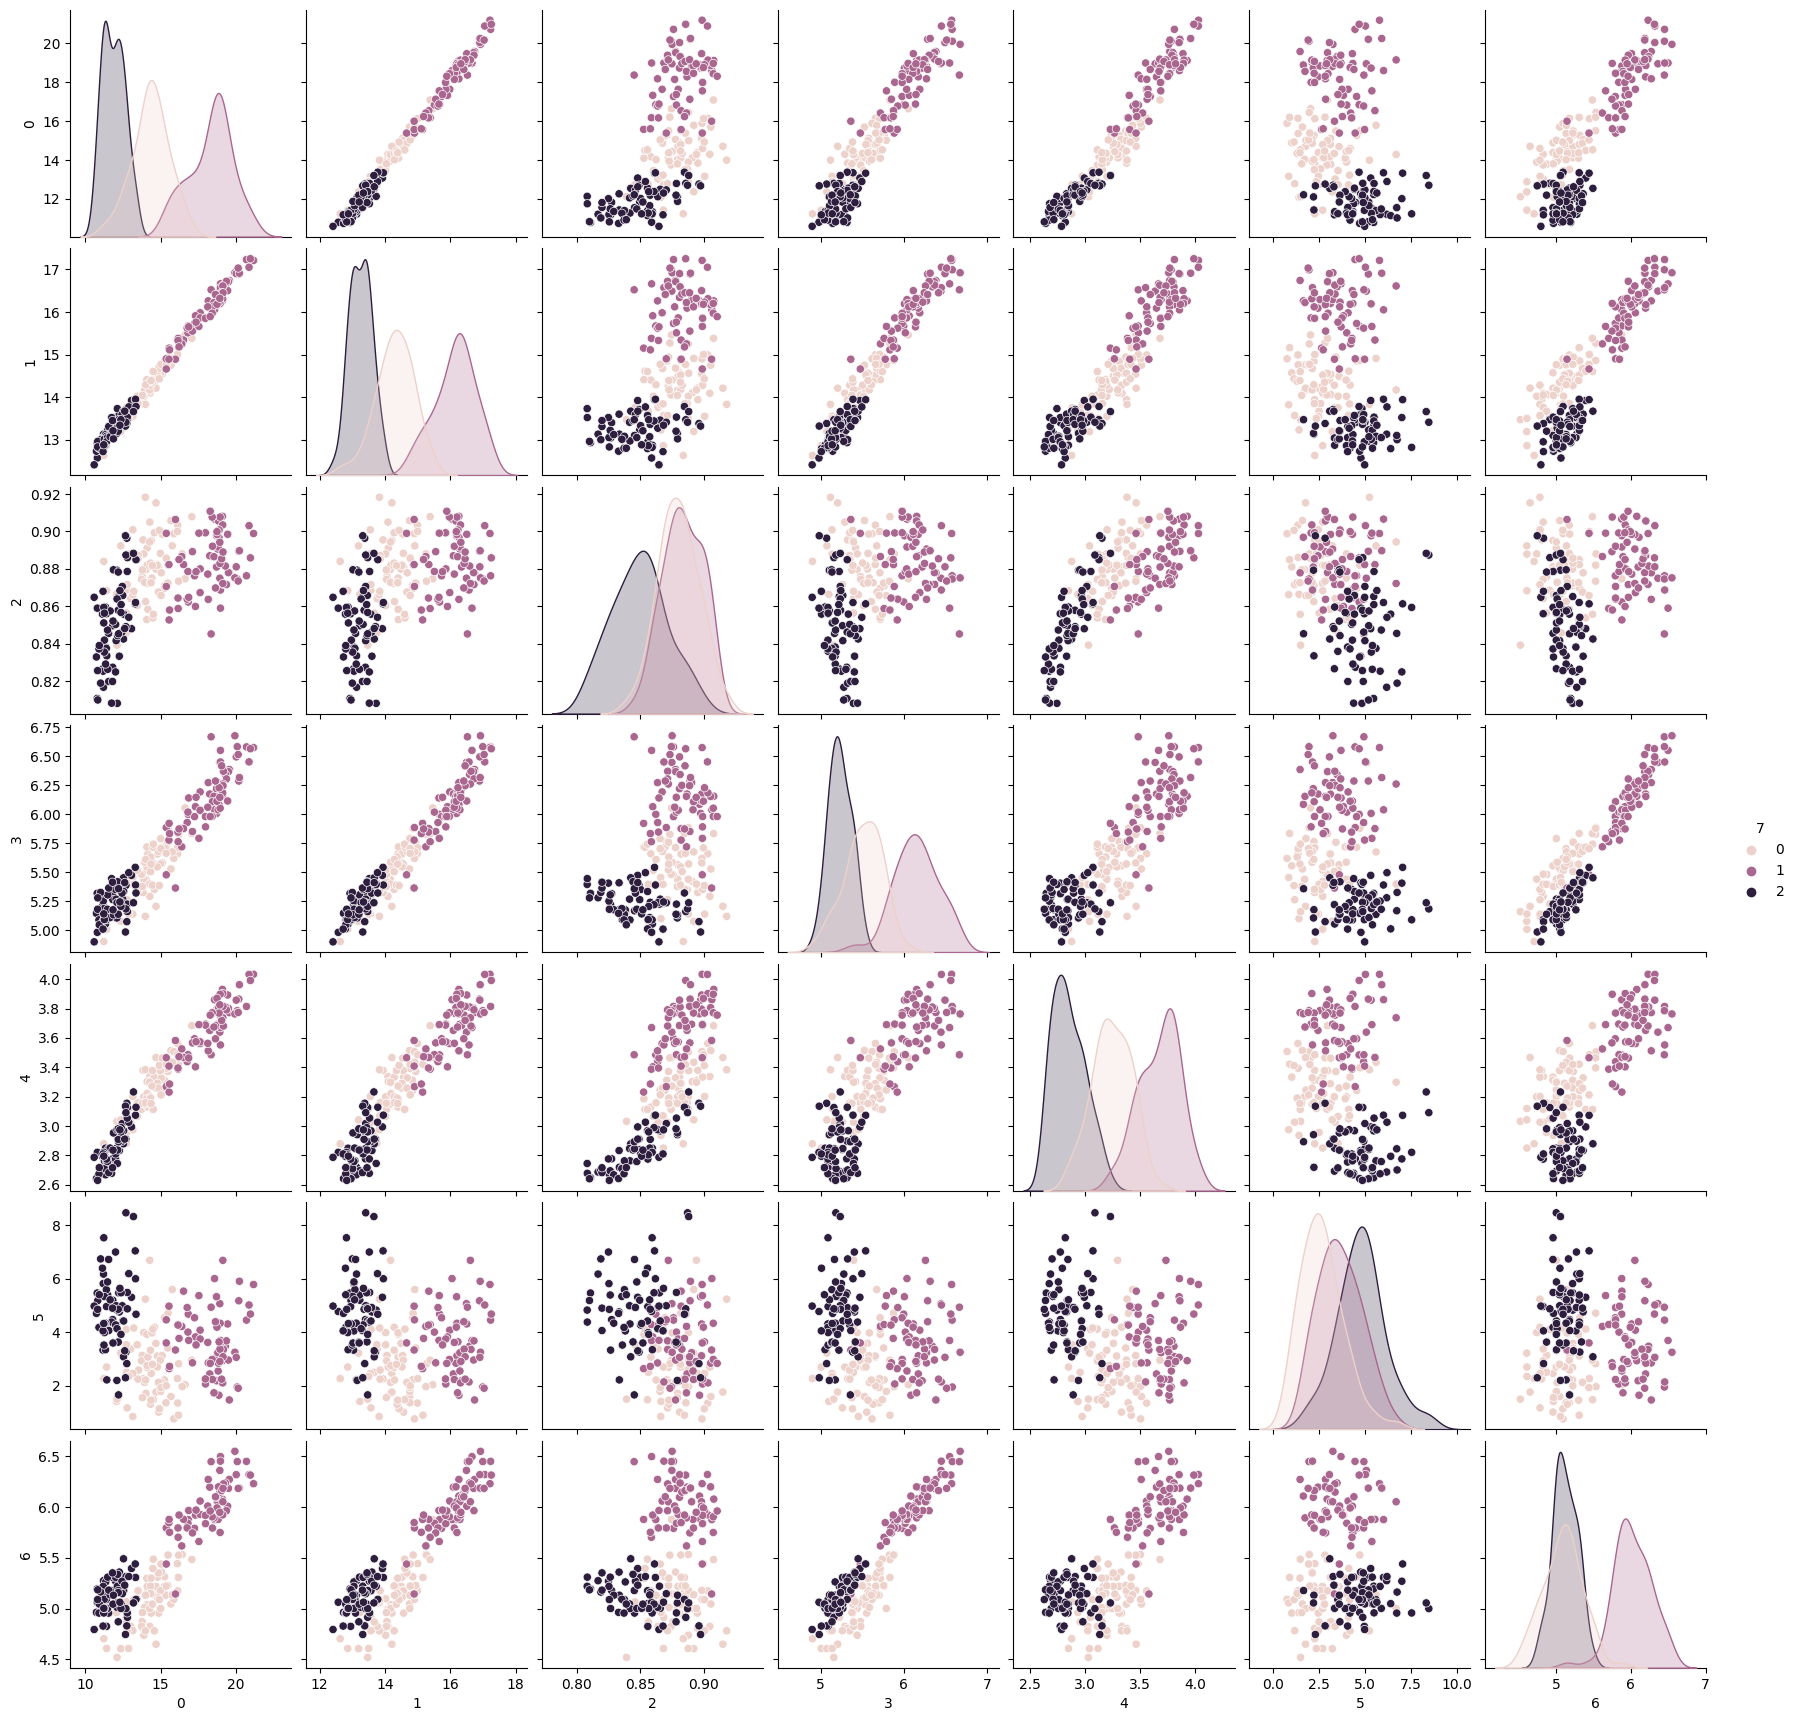

In [5]:
sns.pairplot(data, hue=7);

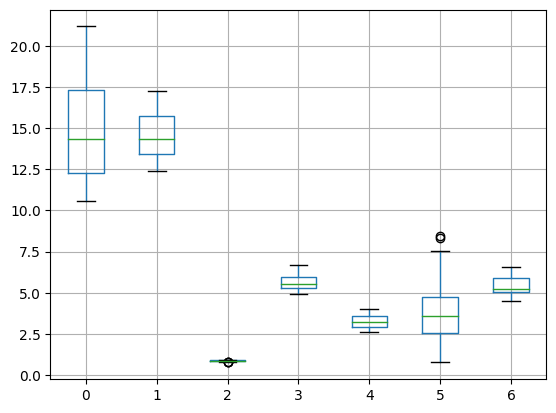

In [9]:
data.boxplot();

In [11]:
data.isnull().sum() > 0 # check column with null values

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
dtype: bool

In [15]:
scaled_data = pd.DataFrame(MinMaxScaler().fit_transform(data.drop(7, axis=1)))
scaled_data[7] = data[7]

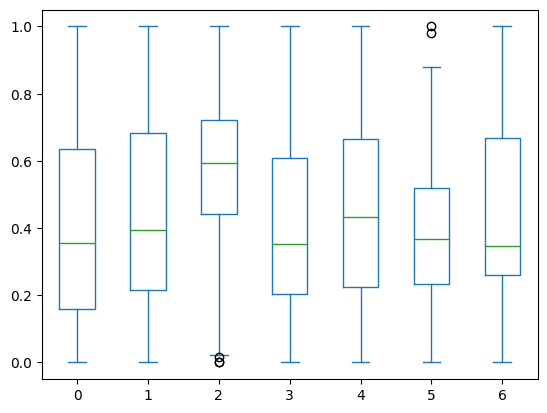

In [17]:
scaled_data.plot.box();

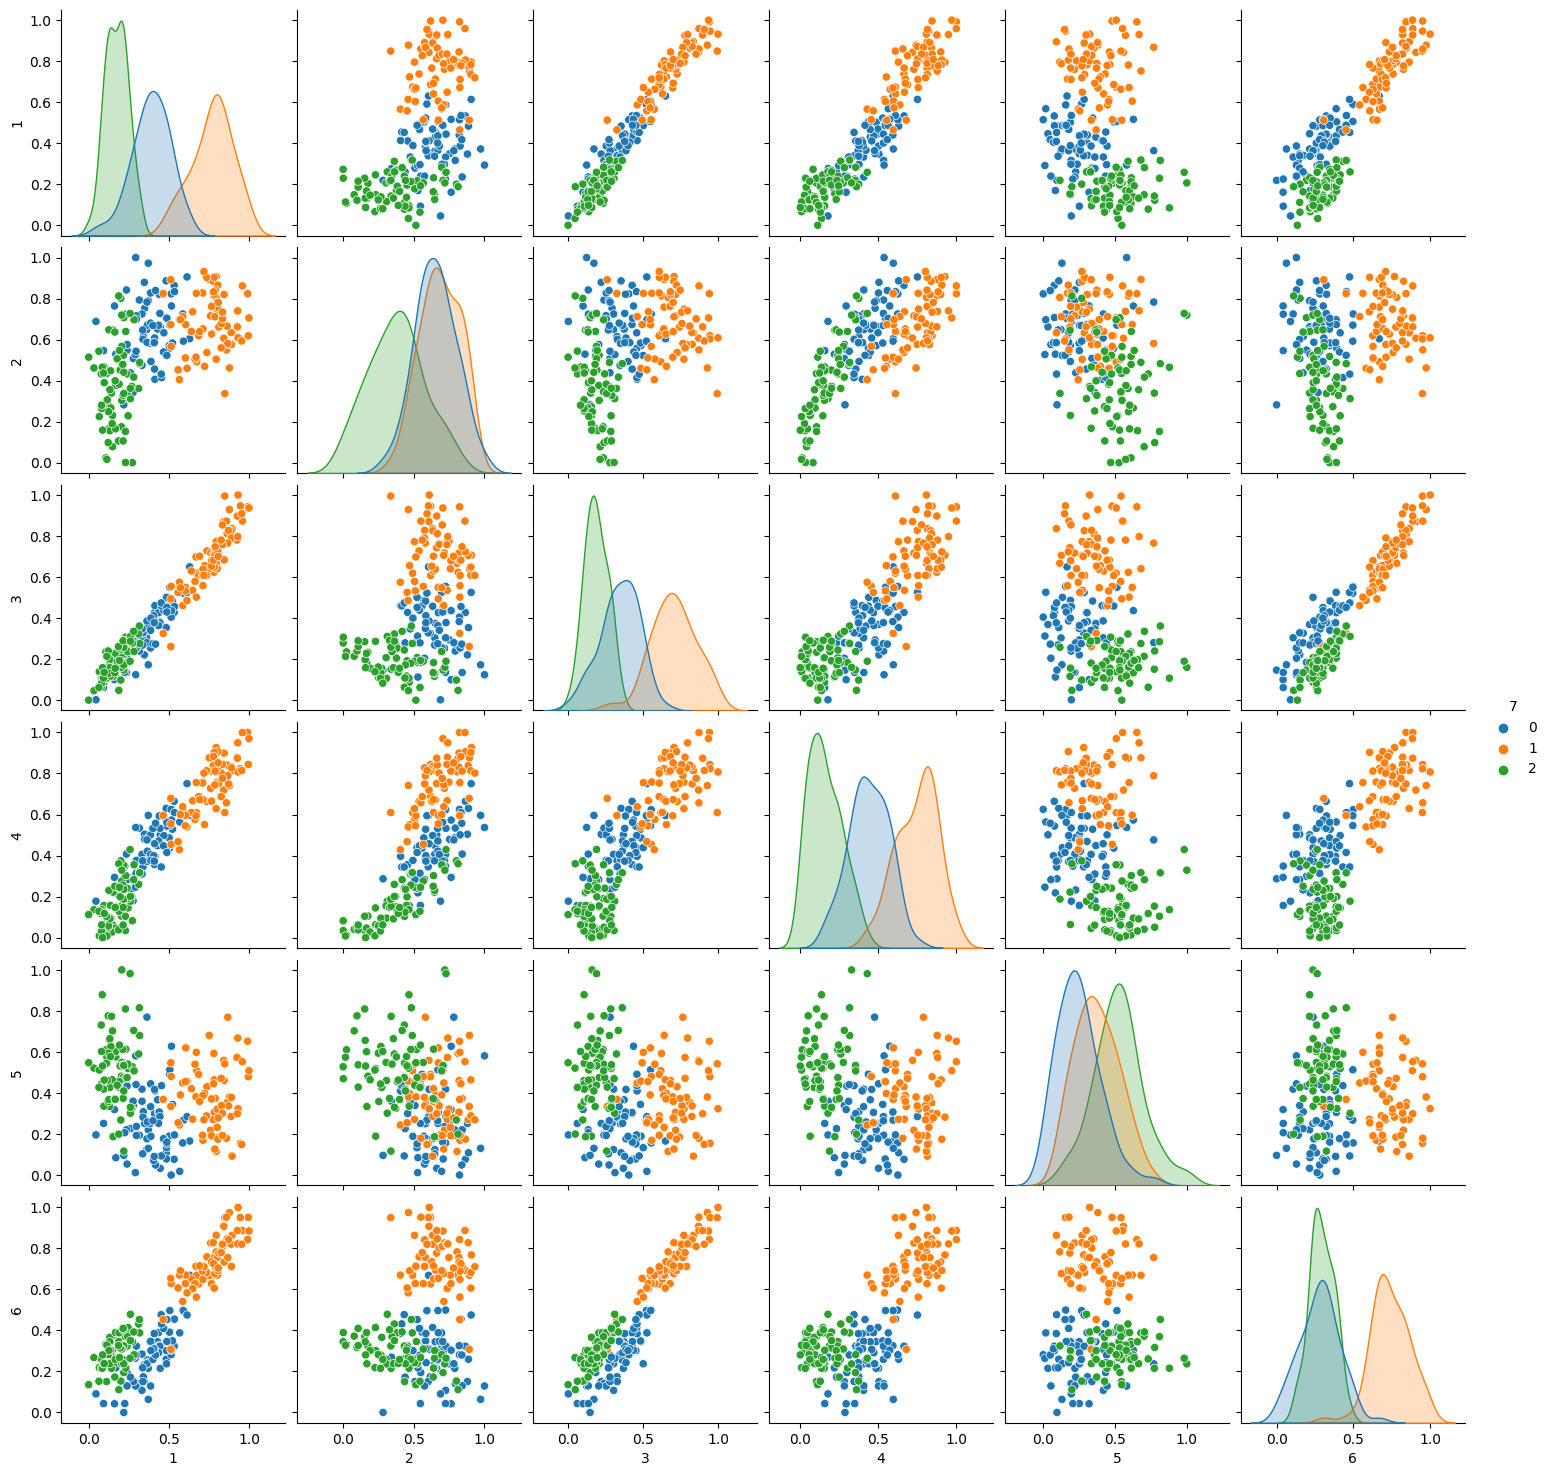

In [19]:
transformed_data = scaled_data.drop(0, axis=1)
sns.pairplot(transformed_data, hue=7);

In [20]:
X = transformed_data.drop(7,axis=1)
y = transformed_data[7]

In [26]:
range_value = range(2,9)

silhouette_values = []
inertia_values = []

for i in range_value:
    kmeans = KMeans(n_clusters=i, random_state=random_state)
    y_predicted = kmeans.fit_predict(X)
    silhouette_values.append(silhouette_score(X,y_predicted))
    inertia_values.append(kmeans.inertia_)

In [28]:
def two_plots(x, y1, y2, xlabel, y1label, y2label):

	fig, ax1 = plt.subplots()
	
	color = 'tab:red'
	ax1.set_xlabel(xlabel)
	ax1.set_ylabel(y1label, color=color)
	ax1.plot(x, y1, color=color)
	ax1.tick_params(axis='y', labelcolor=color)
	
	ax2 = ax1.twinx() # instantiate a second axes that shares the same x-axis
	color = 'tab:blue'
	ax2.set_ylabel(y2label, color=color) # we already handled the x-label with ax1
	ax2.plot(x, y2, color=color)
	ax2.tick_params(axis='y', labelcolor=color)
	ax2.set_ylim(0,1) # the axis for silhouette is [0,1]
	fig.tight_layout() # otherwise the right y-label is slightly clipped
	
	plt.show()
	
def transform(y_true, y_pred):
	y_mapped = y_pred.copy()
	for lab in np.unique(y_pred):
		if y_true.str.contains(lab).any():
			true_l, count = np.unique(y_true[y_pred==lab], return_counts=True)
			y_mapped[y_pred==lab] = true_l[np.argmax(count)]
		else:
			y_mapped[y_pred==lab] = lab
	return y_mapped

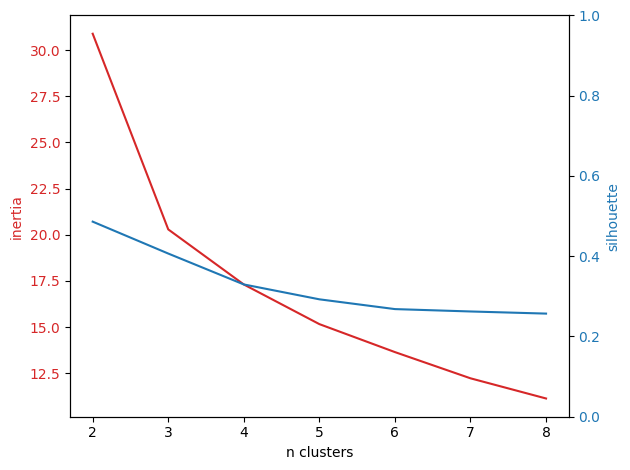

In [29]:
two_plots(range_value, inertia_values, silhouette_values, 'n clusters', 'inertia', 'silhouette')

accuracy against the golden standard is: 92.0


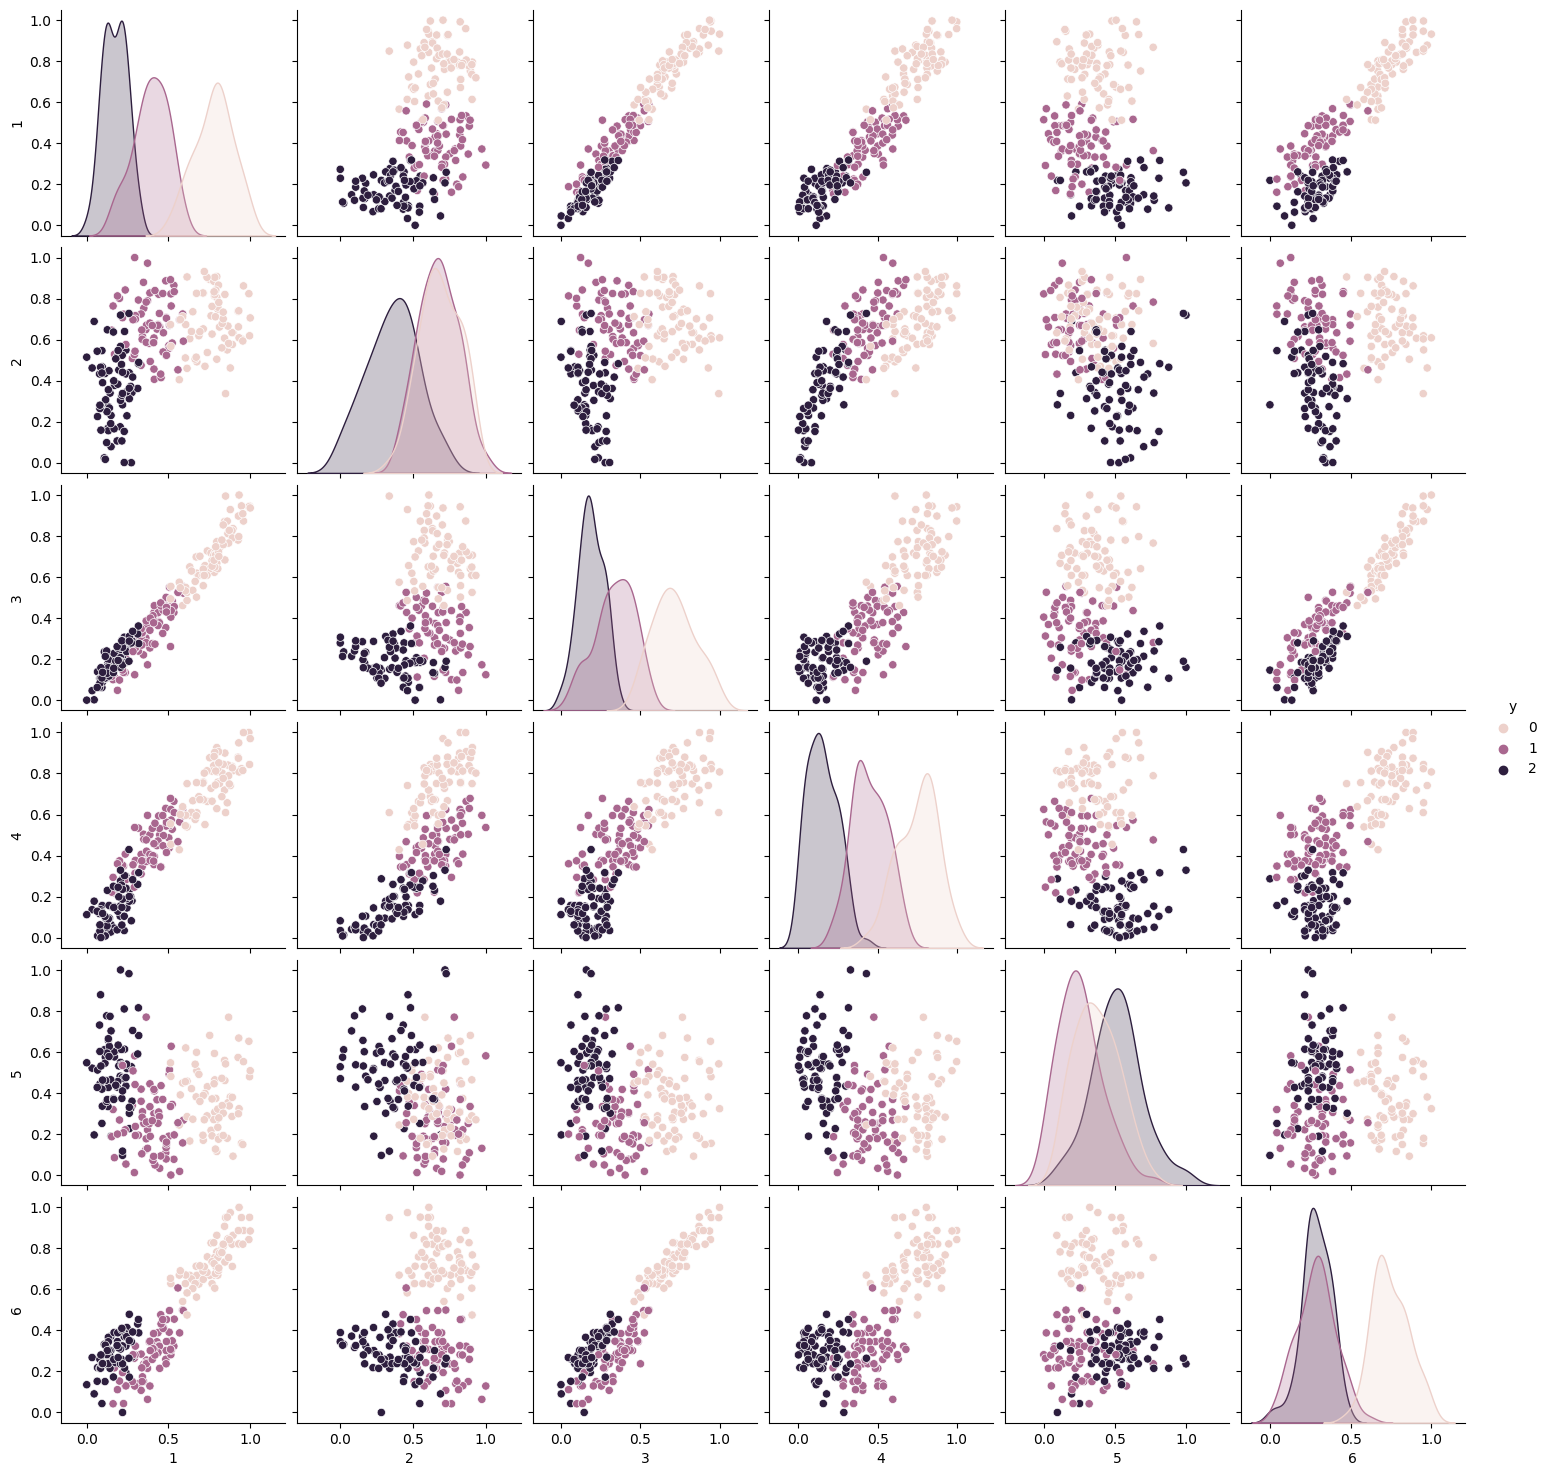

In [32]:
kmeans = KMeans(n_clusters=3, random_state=random_state)
y_predicted = kmeans.fit_predict(X)
data_to_plot = X.copy()
data_to_plot['y'] = y_predicted
sns.pairplot(data_to_plot, hue='y');
accuracy = accuracy_score(y, transform(y, y_predicted.astype(str)))
print(f'accuracy against the golden standard is: {round(accuracy, 2) * 100}')